 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
wr_df = pd.read_csv("whale_returns.csv")
wr_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
wr_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
wr_df.dropna(inplace=True)
wr_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [5]:
wr_df.set_index(pd.to_datetime(wr_df['Date'], infer_datetime_format=True), inplace=True)
wr_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [6]:
wr_df.drop(columns=['Date'], inplace=True)
wr_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
ar_df = pd.read_csv("algo_returns.csv")
ar_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [8]:
# Count nulls
ar_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
ar_df.dropna(inplace=True)
ar_df

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [10]:
ar_df.set_index(pd.to_datetime(ar_df['Date'], infer_datetime_format=True), inplace=True)
ar_df.head()

,Date,Algo 1,Algo 2
Date,,,
2014-06-05,2014-06-05,0.004062,0.013285
2014-06-06,2014-06-06,0.001857,0.008284
2014-06-09,2014-06-09,-0.005012,0.005668
2014-06-10,2014-06-10,0.004406,-0.000735
2014-06-11,2014-06-11,0.004760,-0.003761


In [11]:
ar_df.drop(columns=['Date'], inplace=True)
ar_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P TSX 60 Closing Prices
tsx60_df = pd.read_csv("sp_tsx_history.csv")
tsx60_df.head()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [13]:
tsx60_df.dropna(inplace=True)
tsx60_df

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"
...,...,...
1813,20-Dec-2019,"$17,118.44"
1814,23-Dec-2019,"$17,128.71"
1815,24-Dec-2019,"$17,180.15"
1816,27-Dec-2019,"$17,168.21"


In [14]:
# Check Data Types
tsx60_df.dtypes

Date     object
Close    object
dtype: object

In [15]:
# Fix Data Types
tsx60_df['Date'] = pd.to_datetime(tsx60_df['Date'])
tsx60_df

,Date,Close
0,2012-10-01,"$12,370.19"
1,2012-10-02,"$12,391.23"
2,2012-10-03,"$12,359.47"
3,2012-10-04,"$12,447.68"
4,2012-10-05,"$12,418.99"
...,...,...
1813,2019-12-20,"$17,118.44"
1814,2019-12-23,"$17,128.71"
1815,2019-12-24,"$17,180.15"
1816,2019-12-27,"$17,168.21"


In [16]:
tsx60_df["Close"] = tsx60_df["Close"].str.replace("$", "")
tsx60_df

<ipython-input-16-37766a8bc9f7>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  tsx60_df["Close"] = tsx60_df["Close"].str.replace("$", "")


,Date,Close
0,2012-10-01,"12,370.19"
1,2012-10-02,"12,391.23"
2,2012-10-03,"12,359.47"
3,2012-10-04,"12,447.68"
4,2012-10-05,"12,418.99"
...,...,...
1813,2019-12-20,"17,118.44"
1814,2019-12-23,"17,128.71"
1815,2019-12-24,"17,180.15"
1816,2019-12-27,"17,168.21"


In [17]:
tsx60_df["Close"] = tsx60_df["Close"].str.replace(",", "")
tsx60_df

,Date,Close
0,2012-10-01,12370.19
1,2012-10-02,12391.23
2,2012-10-03,12359.47
3,2012-10-04,12447.68
4,2012-10-05,12418.99
...,...,...
1813,2019-12-20,17118.44
1814,2019-12-23,17128.71
1815,2019-12-24,17180.15
1816,2019-12-27,17168.21


In [18]:
tsx60_df['Close'] = pd.to_numeric(tsx60_df['Close'])
tsx60_df

,Date,Close
0,2012-10-01,12370.19
1,2012-10-02,12391.23
2,2012-10-03,12359.47
3,2012-10-04,12447.68
4,2012-10-05,12418.99
...,...,...
1813,2019-12-20,17118.44
1814,2019-12-23,17128.71
1815,2019-12-24,17180.15
1816,2019-12-27,17168.21


In [19]:
tsx60_df['Close'] = pd.to_numeric(tsx60_df['Close'])
tsx60_df

,Date,Close
0,2012-10-01,12370.19
1,2012-10-02,12391.23
2,2012-10-03,12359.47
3,2012-10-04,12447.68
4,2012-10-05,12418.99
...,...,...
1813,2019-12-20,17118.44
1814,2019-12-23,17128.71
1815,2019-12-24,17180.15
1816,2019-12-27,17168.21


In [20]:
 # Set the date as the index to the DataFrame
tsx60_df.set_index(pd.to_datetime(tsx60_df['Date'], infer_datetime_format=True), inplace=True)
tsx60_df.head()

,Date,Close
Date,,
2012-10-01,2012-10-01,12370.19
2012-10-02,2012-10-02,12391.23
2012-10-03,2012-10-03,12359.47
2012-10-04,2012-10-04,12447.68
2012-10-05,2012-10-05,12418.99


In [21]:
# Drop the extra date column
tsx60_df.drop(columns=['Date'], inplace=True)
tsx60_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [22]:
# Calculate Daily Returns
daily_returns = tsx60_df.pct_change()
daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [23]:
# Drop nulls
daily_returns.dropna(inplace=True)
daily_returns

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [24]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns = daily_returns.rename(columns={
    "Close": "TSX60_daily_returns"
})

daily_returns.head()

,TSX60_daily_returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [25]:
tsx60_df=daily_returns
tsx60_df

,TSX60_daily_returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [26]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_data = pd.concat([wr_df,ar_df,tsx60_df], axis="columns", join="inner")
all_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX60_daily_returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

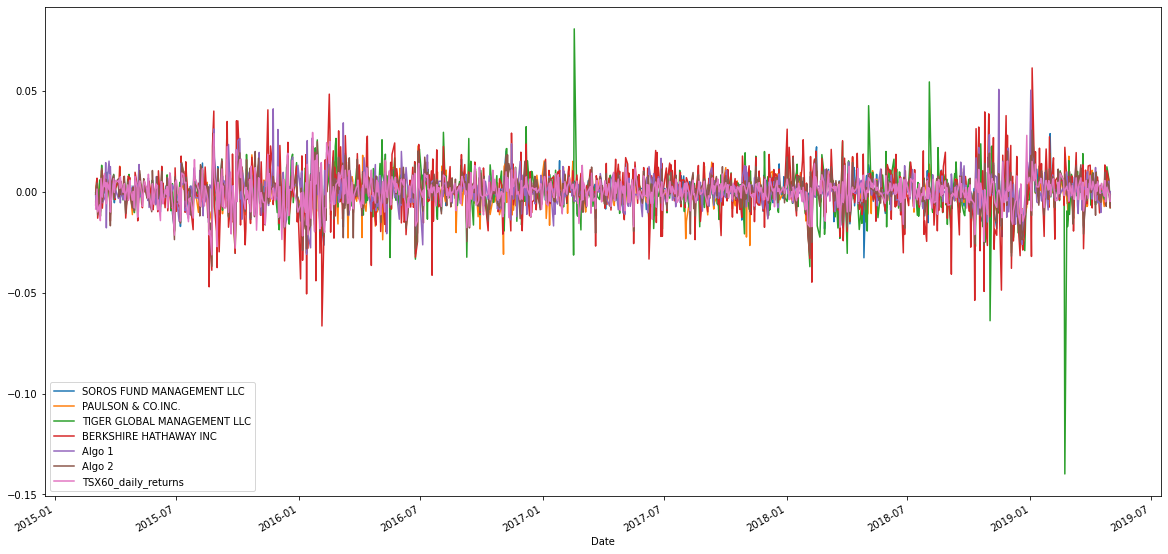

In [27]:
# Plot daily returns of all portfolios
all_data.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

In [28]:
# Calculate cumulative returns of all portfolios
Cummulative_Sum = all_data.cumsum().dropna()

<AxesSubplot:xlabel='Date'>

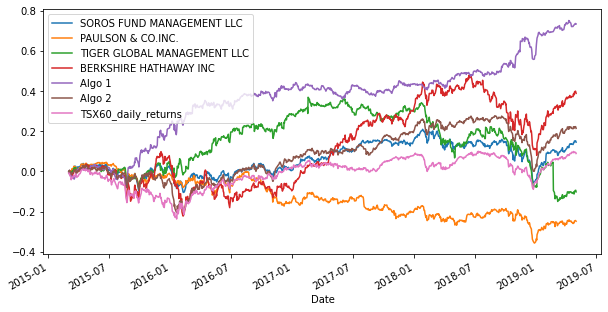

In [29]:
# Plot cumulative returns
Cummulative_Sum.plot(figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


In [30]:
# Box plot to visually show risk
all_data.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'TSX60_daily_returns'],
      dtype='object')

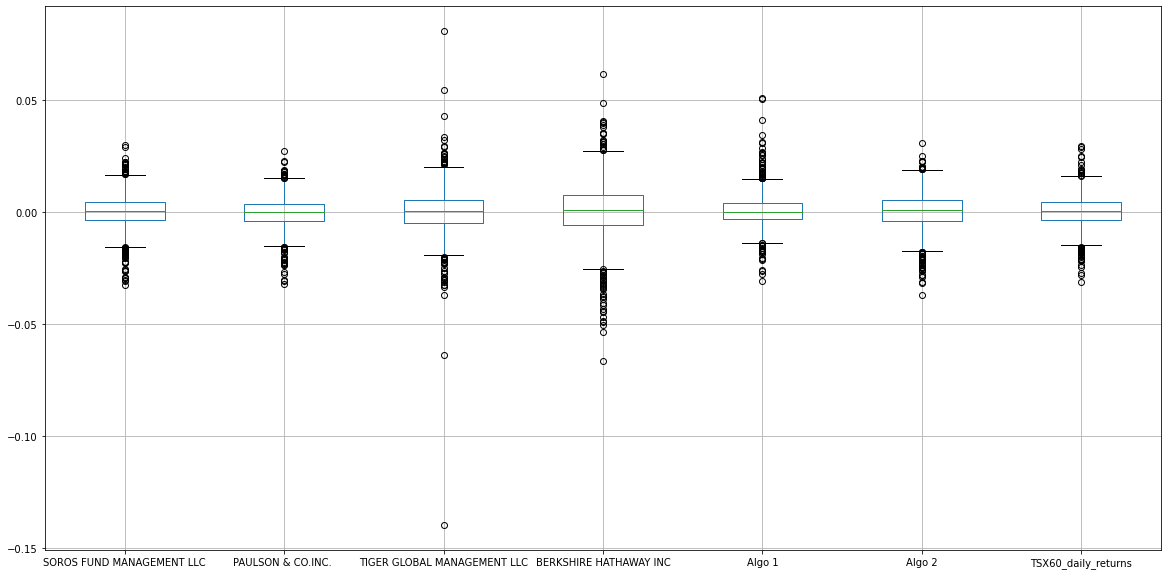

In [31]:
boxplot = all_data.boxplot(column=['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'TSX60_daily_returns'],figsize=(20,10))

In [114]:
#Calculate Standard Deviations
returns_std= all_data.std()
returns_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
TSX60_daily_returns            0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [34]:
# Calculate  the daily standard deviation of S&P TSX 60
tsx60_std= all_data['TSX60_daily_returns'].std()
tsx60_std

0.007034167748577725

In [35]:
# Determine which portfolios are riskier than the S&P TSX 60
returns_std>tsx60_std

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
TSX60_daily_returns            False
dtype: bool

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized standard deviation (252 trading days)
returns_std*np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
TSX60_daily_returns            0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

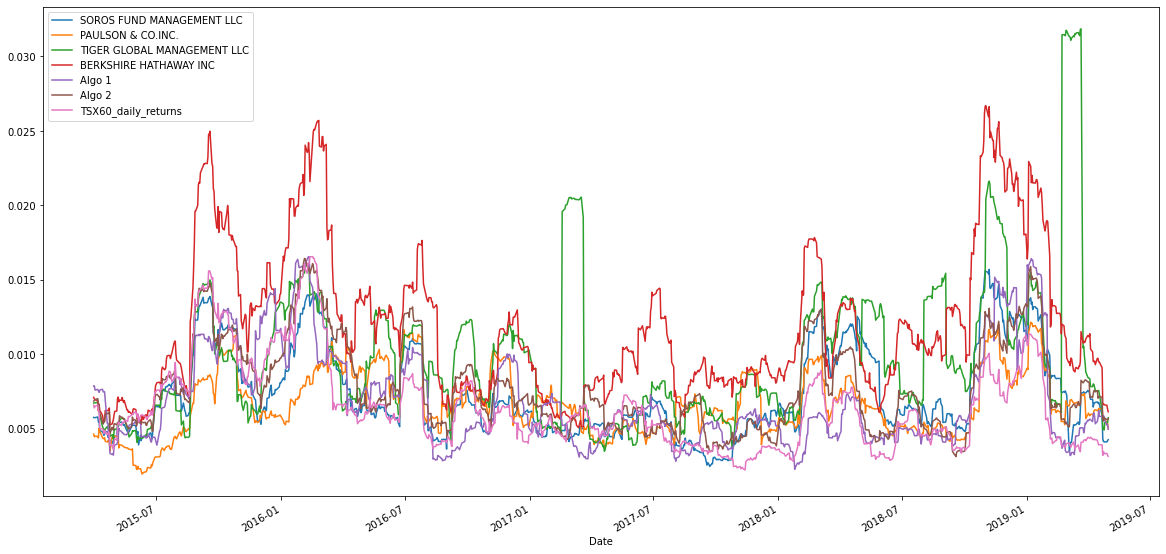

In [133]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
all_data.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [38]:
# Calculate the correlation
# Display de correlation matrix
all_data.corr(method ='pearson')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX60_daily_returns
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
TSX60_daily_returns,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [40]:
# Calculate covariance of a single portfolio
# Calculate variance of S&P TSX
covariance = all_data['SOROS FUND MANAGEMENT LLC'].cov(all_data['TSX60_daily_returns'])

In [41]:
covariance

3.710689907855223e-05

In [42]:
variance = all_data['TSX60_daily_returns'].var()
variance

4.9479515915131015e-05

In [43]:
# Computing beta
beta = covariance / variance

In [44]:
beta

0.7499446668435332

In [45]:
# Plot beta trend
rolling_covariance = all_data['SOROS FUND MANAGEMENT LLC'].rolling(window=30).cov(all_data['TSX60_daily_returns'])

In [46]:
rolling_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000018
2019-04-26    0.000018
2019-04-29    0.000018
2019-04-30    0.000017
2019-05-01    0.000018
Length: 1029, dtype: float64

In [47]:
rolling_variance = all_data['TSX60_daily_returns'].rolling(window=30).var()

In [48]:
rolling_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000016
2019-04-26    0.000016
2019-04-29    0.000015
2019-04-30    0.000014
2019-05-01    0.000015
Name: TSX60_daily_returns, Length: 1029, dtype: float64

In [49]:
rolling_beta = rolling_covariance / rolling_variance 

<AxesSubplot:title={'center':'Rolling 30day Beta of Soros'}, xlabel='Date'>

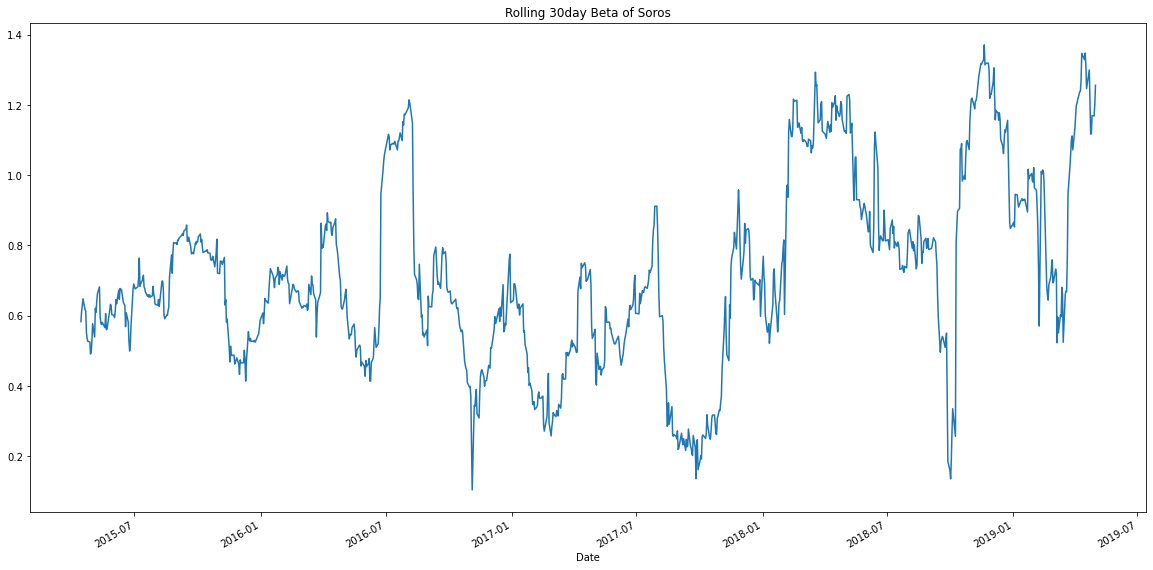

In [50]:
rolling_beta.plot(figsize=(20,10), title = 'Rolling 30day Beta of Soros')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [51]:
# Use `ewm` to calculate the rolling window
all_data.ewm(halflife=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX60_daily_returns
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [52]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_data.mean() * 252) / (returns_std* np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
TSX60_daily_returns            0.195550
dtype: float64

<AxesSubplot:>

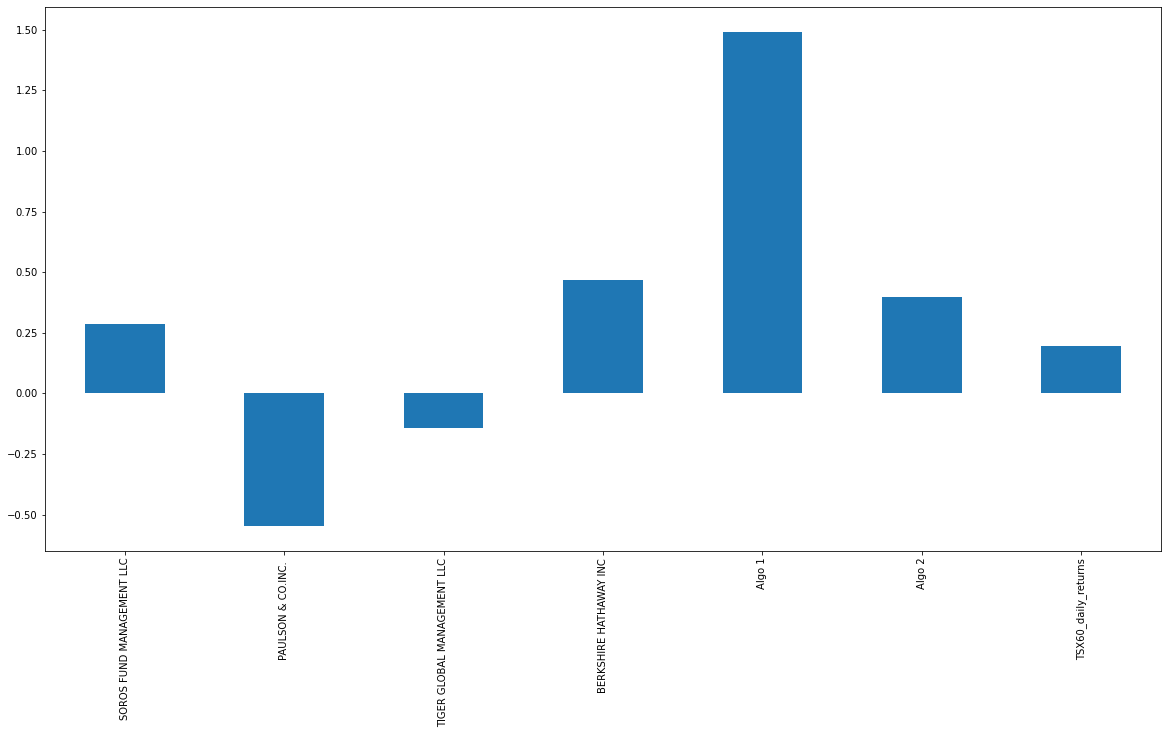

In [53]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize=(20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [ ]:
# Algorithm strategies, specifically 'Algo 1' is outperforming performing both the market (S&P TSX 60) 
# and the whales portfolios
# in the case of 'Algo 2', its performance is outperforming the market but not necessarily all the whales portfolios

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [54]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 8AE6-1B60

 Directory of C:\Users\nhc12\Fintech UofT\0. Homework\4. Pandas Homework

2022-03-18  09:37 PM    <DIR>          .
2022-03-12  11:27 AM    <DIR>          ..
2022-03-18  09:37 PM    <DIR>          .ipynb_checkpoints
2022-03-12  11:10 PM            67,707 algo_returns.csv
2022-03-17  09:32 PM             4,473 apple.csv
2022-03-17  09:32 PM             4,250 bp.csv
2022-03-17  09:31 PM             4,233 pfizer.csv
2022-03-17  09:31 PM             5,750 s&p_tsx_2021.csv
2022-03-12  11:10 PM            46,752 sp_tsx_history.csv
2022-03-18  04:55 PM           782,580 whale_analysis.ipynb
2022-03-12  11:10 PM           100,960 whale_returns.csv
               8 File(s)      1,016,705 bytes
               3 Dir(s)  172,248,375,296 bytes free


In [91]:
# Reading data from 1st stock
apple_df = pd.read_csv("apple.csv")
apple_df.head()

,Date,Close
0,1/2/2018,43.07
1,1/3/2018,43.06
2,1/4/2018,43.26
3,1/5/2018,43.75
4,1/8/2018,43.59


In [92]:
apple_df.set_index(pd.to_datetime(apple_df['Date'], infer_datetime_format=True), inplace=True)
apple_df.head()

,Date,Close
Date,,
2018-01-02,1/2/2018,43.07
2018-01-03,1/3/2018,43.06
2018-01-04,1/4/2018,43.26
2018-01-05,1/5/2018,43.75
2018-01-08,1/8/2018,43.59


In [93]:
apple_df.drop(columns=['Date'], inplace=True)
apple_df.head()

,Close
Date,
2018-01-02,43.07
2018-01-03,43.06
2018-01-04,43.26
2018-01-05,43.75
2018-01-08,43.59


In [94]:
daily_returns_apple = apple_df.pct_change()
daily_returns_apple

,Close
Date,
2018-01-02,NaN
2018-01-03,-0.000232
2018-01-04,0.004645
2018-01-05,0.011327
2018-01-08,-0.003657
...,...
2018-12-21,-0.039021
2018-12-24,-0.025743
2018-12-26,0.070281


In [95]:
daily_returns_apple = daily_returns_apple.rename(columns={
    "Close": "Apple_returns"
})

daily_returns_apple.head()

,Apple_returns
Date,
2018-01-02,NaN
2018-01-03,-0.000232
2018-01-04,0.004645
2018-01-05,0.011327
2018-01-08,-0.003657


In [96]:
# Reading data from 2nd stock
pfizer_df = pd.read_csv("pfizer.csv")
pfizer_df.head()

,Date,Close
0,1/2/2018,34.52
1,1/3/2018,34.78
2,1/4/2018,34.85
3,1/5/2018,34.92
4,1/8/2018,34.53


In [97]:
pfizer_df.set_index(pd.to_datetime(pfizer_df['Date'], infer_datetime_format=True), inplace=True)
pfizer_df.head()

,Date,Close
Date,,
2018-01-02,1/2/2018,34.52
2018-01-03,1/3/2018,34.78
2018-01-04,1/4/2018,34.85
2018-01-05,1/5/2018,34.92
2018-01-08,1/8/2018,34.53


In [98]:
pfizer_df.drop(columns=['Date'], inplace=True)
pfizer_df.head()

,Close
Date,
2018-01-02,34.52
2018-01-03,34.78
2018-01-04,34.85
2018-01-05,34.92
2018-01-08,34.53


In [99]:
daily_returns_pfizer = pfizer_df.pct_change()
daily_returns_pfizer

,Close
Date,
2018-01-02,NaN
2018-01-03,0.007532
2018-01-04,0.002013
2018-01-05,0.002009
2018-01-08,-0.011168
...,...
2018-12-21,-0.000503
2018-12-24,-0.032981
2018-12-26,0.040614


In [100]:
daily_returns_pfizer = daily_returns_pfizer.rename(columns={
    "Close": "Pfizer_returns"
})

daily_returns_pfizer.head()

,Pfizer_returns
Date,
2018-01-02,NaN
2018-01-03,0.007532
2018-01-04,0.002013
2018-01-05,0.002009
2018-01-08,-0.011168


In [101]:
# Reading data from 3rd stock
bp_df = pd.read_csv("bp.csv")
bp_df.head()

,Date,Close
0,1/2/2018,42.38
1,1/3/2018,42.87
2,1/4/2018,43.04
3,1/5/2018,43.10
4,1/8/2018,43.08


In [102]:
bp_df.set_index(pd.to_datetime(bp_df['Date'], infer_datetime_format=True), inplace=True)
bp_df.head()

,Date,Close
Date,,
2018-01-02,1/2/2018,42.38
2018-01-03,1/3/2018,42.87
2018-01-04,1/4/2018,43.04
2018-01-05,1/5/2018,43.10
2018-01-08,1/8/2018,43.08


In [103]:
bp_df.drop(columns=['Date'], inplace=True)
bp_df.head()

,Close
Date,
2018-01-02,42.38
2018-01-03,42.87
2018-01-04,43.04
2018-01-05,43.10
2018-01-08,43.08


In [104]:
daily_returns_bp = bp_df.pct_change()
daily_returns_bp

,Close
Date,
2018-01-02,NaN
2018-01-03,0.011562
2018-01-04,0.003965
2018-01-05,0.001394
2018-01-08,-0.000464
...,...
2018-12-21,0.011004
2018-12-24,-0.027077
2018-12-26,0.038472


In [105]:
daily_returns_bp = daily_returns_bp.rename(columns={
    "Close": "BP_returns"
})

daily_returns_bp.head()

,BP_returns
Date,
2018-01-02,NaN
2018-01-03,0.011562
2018-01-04,0.003965
2018-01-05,0.001394
2018-01-08,-0.000464


In [106]:
# Combine all stocks in a single DataFrame
# Reset Date index
# Reorganize portfolio data by having a column per symbol
# Calculate daily returns
# Display sample data
all_data_new = pd.concat([daily_returns_apple,daily_returns_pfizer,daily_returns_bp], axis="columns", join="inner")
all_data_new.head()

,Apple_returns,Pfizer_returns,BP_returns
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.000232,0.007532,0.011562
2018-01-04,0.004645,0.002013,0.003965
2018-01-05,0.011327,0.002009,0.001394
2018-01-08,-0.003657,-0.011168,-0.000464


In [107]:
# Drop NAs
all_data_new.dropna(inplace=True)
all_data_new

,Apple_returns,Pfizer_returns,BP_returns
Date,,,
2018-01-03,-0.000232,0.007532,0.011562
2018-01-04,0.004645,0.002013,0.003965
2018-01-05,0.011327,0.002009,0.001394
2018-01-08,-0.003657,-0.011168,-0.000464
2018-01-09,-0.000229,-0.001158,-0.004875
...,...,...,...
2018-12-21,-0.039021,-0.000503,0.011004
2018-12-24,-0.025743,-0.032981,-0.027077
2018-12-26,0.070281,0.040614,0.038472


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [108]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
all_data_new2 = all_data_new.dot(weights)

In [109]:
# Display sample data
all_data_new2

Date
2018-01-03    0.006287
2018-01-04    0.003541
2018-01-05    0.004910
2018-01-08   -0.005097
2018-01-09   -0.002087
                ...   
2018-12-21   -0.009507
2018-12-24   -0.028600
2018-12-26    0.049789
2018-12-27    0.000159
2018-12-28    0.004608
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [111]:
# Join your returns DataFrame to the original returns DataFrame
# Only compare dates where return data exists for all the stocks (drop NaNs)
full_data = pd.concat([all_data,all_data_new], axis="columns", join="inner")
full_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX60_daily_returns,Apple_returns,Pfizer_returns,BP_returns
Date,,,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,-0.000232,0.007532,0.011562
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004645,0.002013,0.003965
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.011327,0.002009,0.001394
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.003657,-0.011168,-0.000464
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000229,-0.001158,-0.004875


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [112]:
# Calculate standard deviation
returns2_std= full_data.std()
returns2_std

SOROS FUND MANAGEMENT LLC      0.009633
PAULSON & CO.INC.              0.007252
TIGER GLOBAL MANAGEMENT LLC    0.012378
BERKSHIRE HATHAWAY INC         0.014799
Algo 1                         0.007502
Algo 2                         0.008861
TSX60_daily_returns            0.006639
Apple_returns                  0.017732
Pfizer_returns                 0.012355
BP_returns                     0.014596
dtype: float64

In [113]:
# Calculate the annualized `std`
returns2_std*np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.152921
PAULSON & CO.INC.              0.115116
TIGER GLOBAL MANAGEMENT LLC    0.196488
BERKSHIRE HATHAWAY INC         0.234929
Algo 1                         0.119095
Algo 2                         0.140671
TSX60_daily_returns            0.105392
Apple_returns                  0.281492
Pfizer_returns                 0.196128
BP_returns                     0.231705
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

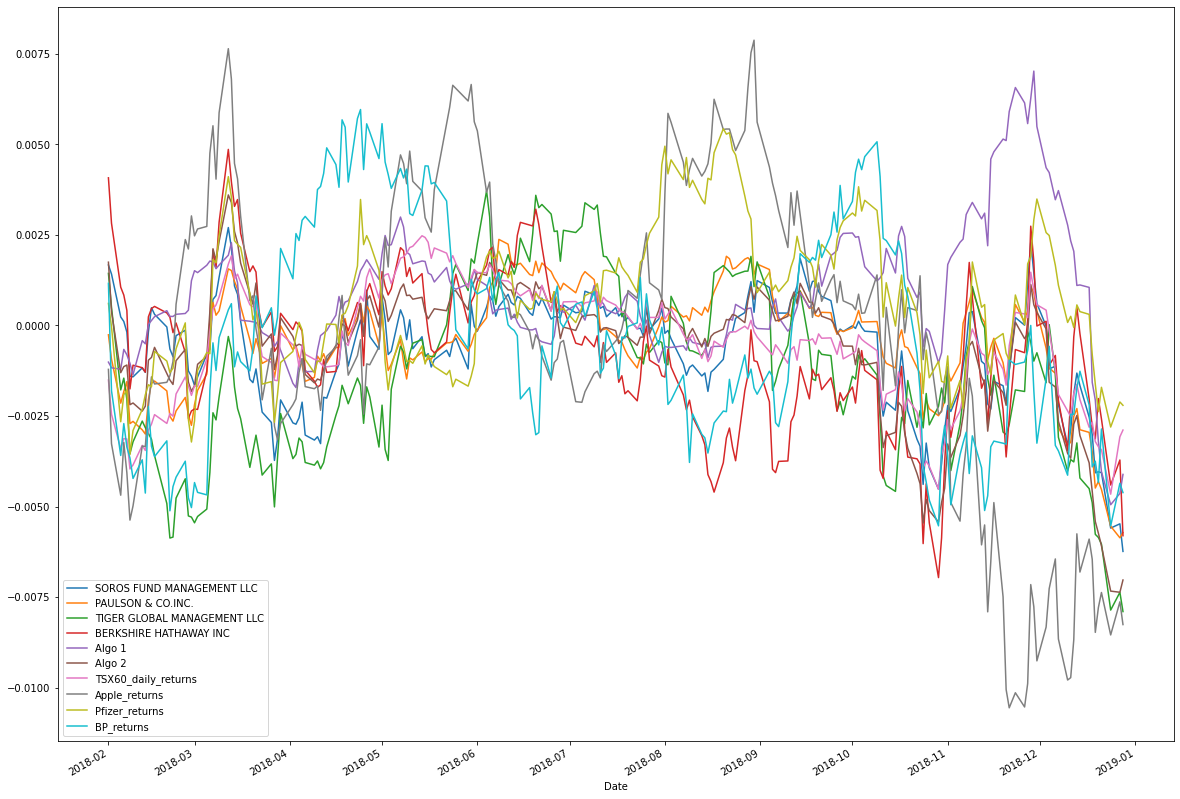

In [119]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
full_data.rolling(window=21).mean().plot(figsize=(20,15))

### Calculate and plot the correlation

In [120]:
# Calculate and plot the correlation
full_data.corr(method ='kendall')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX60_daily_returns,Apple_returns,Pfizer_returns,BP_returns
SOROS FUND MANAGEMENT LLC,1.000000,0.579892,0.482119,0.574157,0.172452,0.629896,0.471950,0.438162,0.288067,0.324798
PAULSON & CO.INC.,0.579892,1.000000,0.487922,0.449865,0.116722,0.578349,0.443477,0.369273,0.339369,0.345174
TIGER GLOBAL MANAGEMENT LLC,0.482119,0.487922,1.000000,0.366667,0.093310,0.463178,0.367439,0.353687,0.354962,0.230004
BERKSHIRE HATHAWAY INC,0.574157,0.449865,0.366667,1.000000,0.170091,0.553993,0.426677,0.448755,0.249118,0.308808
Algo 1,0.172452,0.116722,0.093310,0.170091,1.000000,0.139715,0.200634,0.161174,0.050993,0.157660
Algo 2,0.629896,0.578349,0.463178,0.553993,0.139715,1.000000,0.546448,0.450126,0.314766,0.362612
TSX60_daily_returns,0.471950,0.443477,0.367439,0.426677,0.200634,0.546448,1.000000,0.368089,0.271164,0.365783
Apple_returns,0.438162,0.369273,0.353687,0.448755,0.161174,0.450126,0.368089,1.000000,0.272658,0.268038
Pfizer_returns,0.288067,0.339369,0.354962,0.249118,0.050993,0.314766,0.271164,0.272658,1.000000,0.231342
BP_returns,0.324798,0.345174,0.230004,0.308808,0.157660,0.362612,0.365783,0.268038,0.231342,1.000000


In [121]:
import seaborn as sns

<AxesSubplot:>

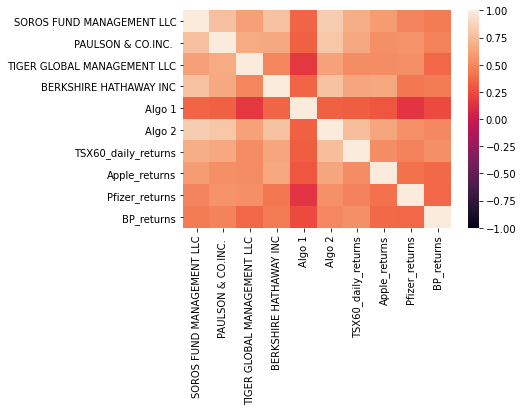

In [123]:
sns.heatmap(full_data.corr(), vmin = -1, vmax = 1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [125]:
# Calculate and plot Beta
rolling_covariance = full_data['Pfizer_returns'].rolling(window=60).cov(full_data['TSX60_daily_returns'])
rolling_covariance

Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2018-12-20    0.000062
2018-12-21    0.000062
2018-12-24    0.000067
2018-12-27    0.000075
2018-12-28    0.000076
Length: 244, dtype: float64

In [127]:
rolling_variance = full_data['TSX60_daily_returns'].rolling(window=60).var()
rolling_variance

Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2018-12-20    0.000067
2018-12-21    0.000069
2018-12-24    0.000071
2018-12-27    0.000086
2018-12-28    0.000086
Name: TSX60_daily_returns, Length: 244, dtype: float64

In [129]:
rolling_beta = rolling_covariance / rolling_variance 
rolling_beta

Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2018-12-20    0.924513
2018-12-21    0.890256
2018-12-24    0.943420
2018-12-27    0.869185
2018-12-28    0.878908
Length: 244, dtype: float64

<AxesSubplot:title={'center':'Rolling 60 day Beta of Pfizer'}, xlabel='Date'>

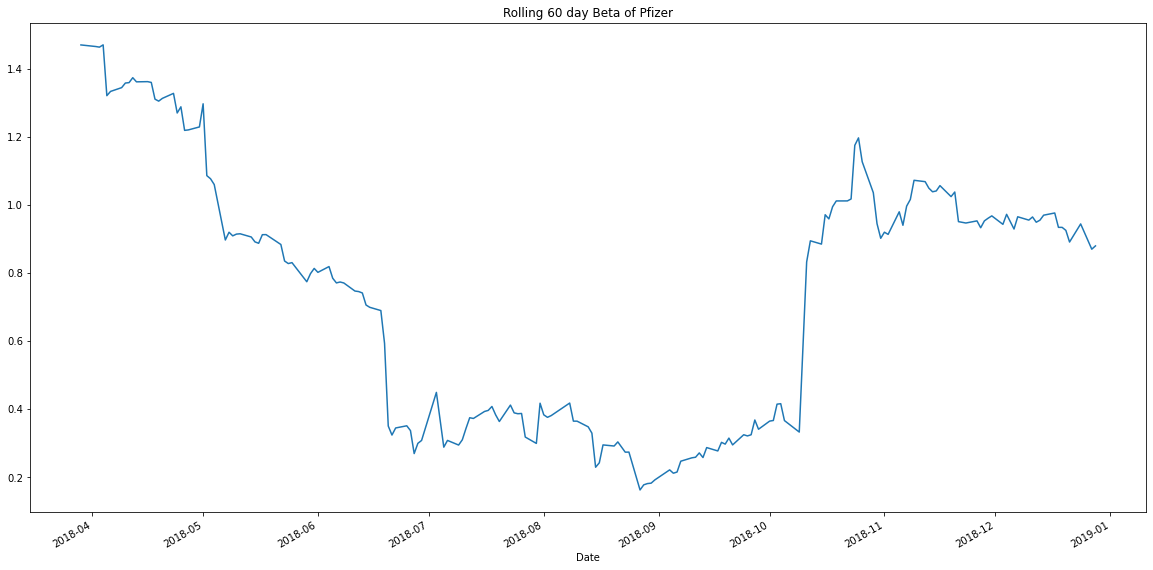

In [130]:
rolling_beta.plot(figsize=(20,10), title = 'Rolling 60 day Beta of Pfizer')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [131]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (full_data.mean() * 252) / (returns2_std* np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC     -1.437678
PAULSON & CO.INC.             -1.497390
TIGER GLOBAL MANAGEMENT LLC   -1.942983
BERKSHIRE HATHAWAY INC        -0.977670
Algo 1                         1.189240
Algo 2                        -1.449390
TSX60_daily_returns           -1.391115
Apple_returns                 -0.544174
Pfizer_returns                 0.615021
BP_returns                    -0.466095
dtype: float64

<AxesSubplot:>

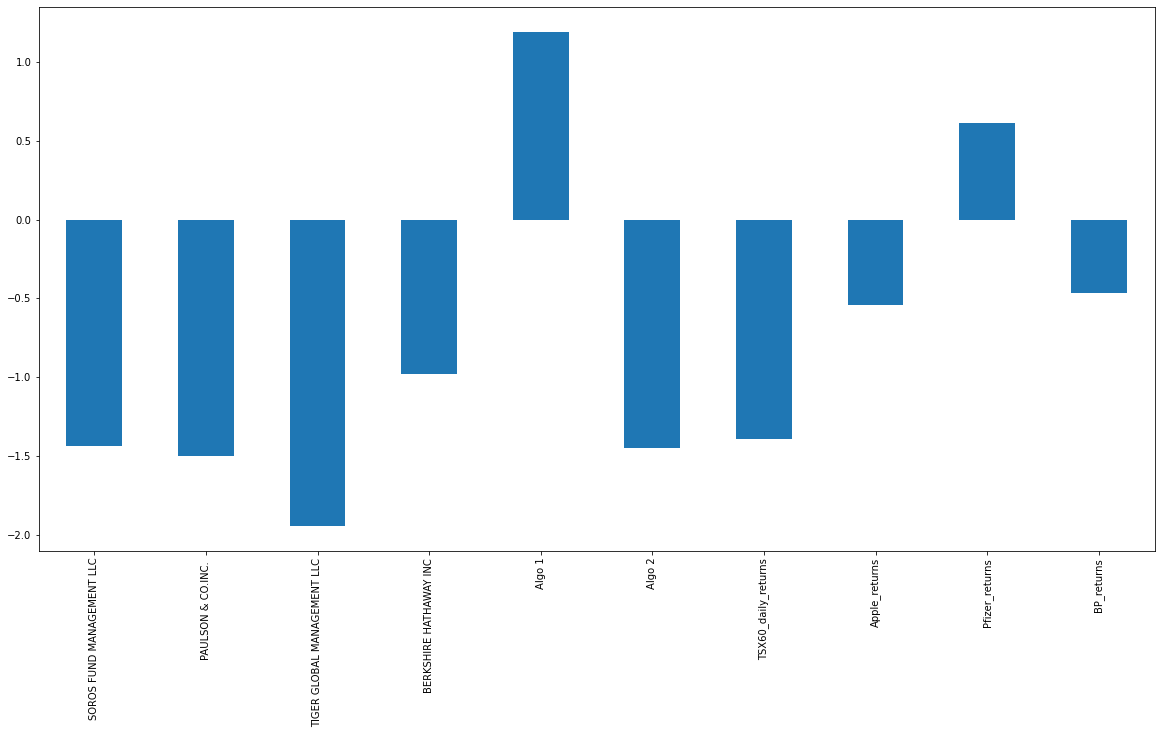

In [132]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize=(20,10))

### How does your portfolio do?

Write your answer here!

In [ ]:
# the performance of the portfolio is negative, only highlight remains in 'Algo 1' and Pfizer. 